In [78]:
import openml
from utils import data
import pandas as pd
from sklearn import datasets, model_selection
from sklearn.impute import KNNImputer
import numpy as np
import matplotlib.pyplot as plt

In [79]:
task_id = 233092
task = openml.tasks.get_task(task_id)
id = task.dataset_id #suppose we input the task id 
df = data.read_dataset_by_id(id)
print(df.keys())

INFO:openml.datasets.dataset:pickle write arrhythmia
dict_keys(['features', 'outputs', 'target', 'labels', 'columns', 'categorical', 'categories', 'n_categorical', 'numerical', 'n_numerical'])


In [93]:
n_instances = len(df["outputs"].codes)
X = df["features"]
y = df["outputs"].codes

In [88]:
print(f"The total instances {n_instances}")

The total instances 452


In [94]:
categorical_features = df['categorical'].tolist() #list with the names of the categorical features
#n_categorical = len(categorical_features)
n_categories = df['n_categorical'] #list of number of categories for each categorical feature

numerical_features = df['numerical'].tolist() #list with the names of the numerical features
n_numerical = len(numerical_features)

X_numerical = X[numerical_features]  # Assuming numerical_features is a list of column names
X_categorical = X[categorical_features]  # Assuming categorical_features is a list of column names

#Fix missing values
#this for loop creates a one-hot encoding for each categorical feature
for col in categorical_features:
    X_categorical[col], _ = pd.factorize(X_categorical[col])
    
# Impute missing values in numerical features USING KNN IMPUTER
imputer = KNNImputer(n_neighbors=10)
numerical_imputed = imputer.fit_transform(X_numerical)
X_numerical = pd.DataFrame(numerical_imputed, columns=X_numerical.columns) # Convert NumPy array back to Pandas DataFrame

X_ordered = pd.concat([X_numerical, X_categorical], axis=1) #ordered columns, first numerical then categorical


/tmp/ipykernel_41156/1691210885.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_categorical[col], _ = pd.factorize(X_categorical[col])


In [95]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.20, random_state= 11, stratify=y)
train_indices, val_indices = model_selection.train_test_split(np.arange(X_train.shape[0]), test_size=1/3, stratify=y_train) #1/3 of train is equal to 20% of total

In [96]:
validation_y = [y_train[i] for i in val_indices]
train_y = [y_train[i] for i in train_indices]

In [97]:
def plot_classes(new_array):
    # Create a histogram with more customizations
    plt.hist(new_array, color='skyblue', edgecolor='black', alpha=0.7)

    # Add titles and labels
    plt.title('Customized Histogram of Data')
    plt.xlabel('Value')
    plt.ylabel('Frequency')

    # Show the histogram
    plt.show()

General Trainning classes


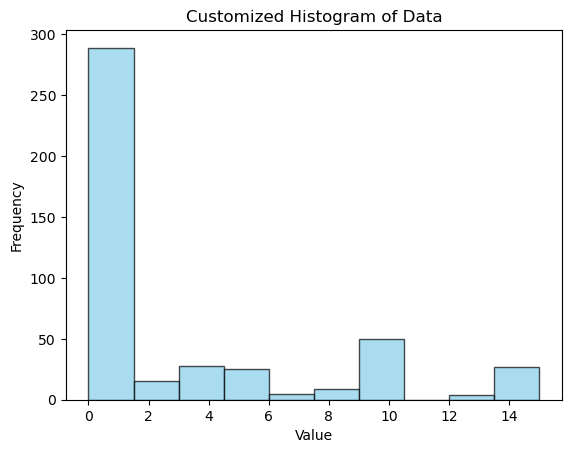

In [99]:
print("General Trainning classes")
plot_classes(y)

General Testing classes


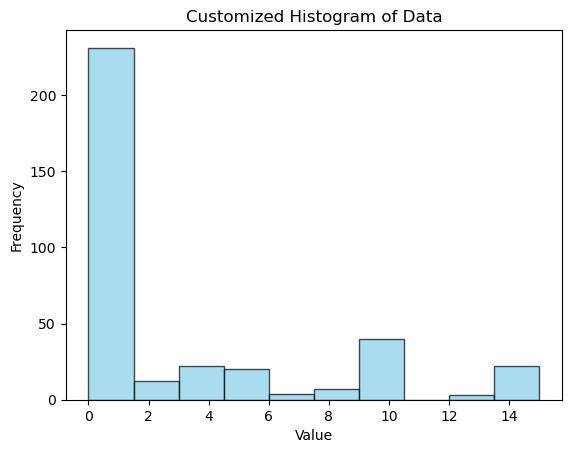

In [102]:
print("General Testing classes")
plot_classes(y_train)

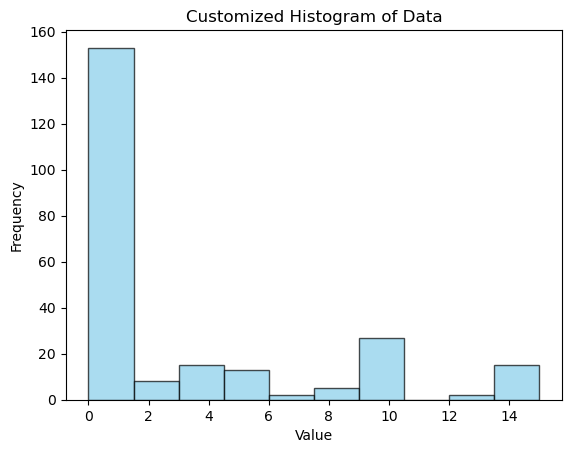

In [104]:
plot_classes(train_y)

Validation classes


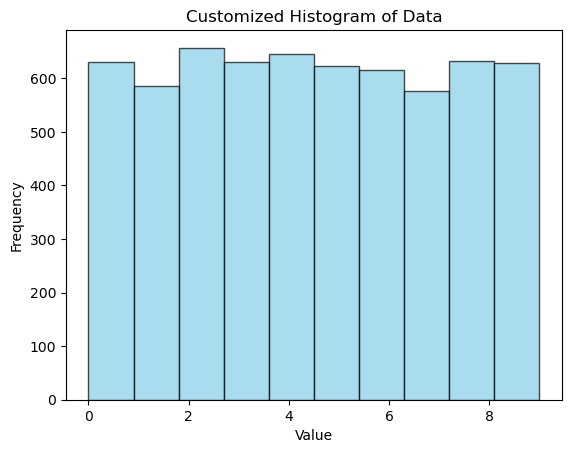

In [77]:
print("Validation classes")
plot_classes(new_array_y)